<a href="https://colab.research.google.com/github/BenzterBit/DL-QSTP-Codes/blob/master/DCGAN(MODIFIED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn,optim
from torch.autograd import Variable
from torchvision import transforms,datasets

In [0]:
pip install tensorboardx


In [0]:
from google.colab import files
files.upload()

Saving utils.py to utils (3).py


{'utils.py': b"import os\nimport numpy as np\nimport errno\nimport torchvision.utils as vutils\nfrom tensorboardX import SummaryWriter\nfrom IPython import display\nfrom matplotlib import pyplot as plt\nimport torch\n\n'''\n    TensorBoard Data will be stored in './runs' path\n'''\n\n\nclass Logger:\n\n    def __init__(self, model_name, data_name):\n        self.model_name = model_name\n        self.data_name = data_name\n\n        self.comment = '{}_{}'.format(model_name, data_name)\n        self.data_subdir = '{}/{}'.format(model_name, data_name)\n\n        # TensorBoard\n        self.writer = SummaryWriter(comment=self.comment)\n\n    def log(self, d_error, g_error, epoch, n_batch, num_batches):\n\n        # var_class = torch.autograd.variable.Variable\n        if isinstance(d_error, torch.autograd.Variable):\n            d_error = d_error.data.cpu().numpy()\n        if isinstance(g_error, torch.autograd.Variable):\n            g_error = g_error.data.cpu().numpy()\n\n        step = 

In [0]:
from utils import Logger

In [0]:
transform =transforms.Compose( [
    transforms.Resize(64),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))
])
trainset = datasets.MNIST(root='./data',train = True, download = True,transform = transform)
data_loader = torch.utils.data.DataLoader(trainset,batch_size = 128, shuffle = True )
num_batches = len(data_loader)

In [59]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    in_features =1*28*28 
    out = 1
    
    self.hidden0 = nn.Sequential(
    nn.Conv2d(1,128,kernel_size=4, stride = 2 , padding = 1,bias=False),
    nn.LeakyReLU(0.2, inplace=True),
    nn.BatchNorm2d(128)
    )
    
    self.hidden1= nn.Sequential(
    nn.Conv2d(128,256,4,2,1,bias=False),
    nn.LeakyReLU(0.2, inplace=True),
    nn.BatchNorm2d(256)
    )
    
    self.hidden2 = nn.Sequential(
    nn.Conv2d(256,512,4,2,1,bias=False),
    nn.LeakyReLU(0.2, inplace=True),
    nn.BatchNorm2d(512)
    )
    
    self.hidden3 = nn.Sequential(
    nn.Conv2d(512,1024,4,2,1,bias=False),
    nn.LeakyReLU(0.2, inplace=True),
    nn.BatchNorm2d(1024)
    )
    
    self.out = nn.Sequential(
    nn.Conv2d(1024,1,4,1,0,bias=False),
    nn.Sigmoid()
    )
    
  def forward(self,x):
    out = self.hidden0(x)
    out = self.hidden1(out)
    out = self.hidden2(out)
    out = self.hidden3(out)
    out = self.out(out)
    return out

discriminator = Discriminator()
discriminator.cuda()

Discriminator(
  (hidden0): Sequential(
    (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden1): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden2): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden3): Sequential(
    (0): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affi

In [60]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    
    self.hidden0 = nn.Sequential(
    nn.ConvTranspose2d(100,1024,kernel_size=4, stride = 1 , padding = 0,bias=False),
    nn.ReLU(True),
    nn.BatchNorm2d(1024)
    )
    
    self.hidden1= nn.Sequential(
    nn.ConvTranspose2d(1024,512,4,2,1,bias=False),
    nn.ReLU(True),
    nn.BatchNorm2d(512)
    )
    
    self.hidden2 = nn.Sequential(
    nn.ConvTranspose2d(512,256,4,2,1,bias=False),
    nn.ReLU(True),
    nn.BatchNorm2d(256)
    )
    
    self.hidden3 = nn.Sequential(
    nn.ConvTranspose2d(256,128,4,2,1,bias=False),
    nn.ReLU(True),
    nn.BatchNorm2d(128)
    )
    
    self.out = nn.Sequential(
    nn.ConvTranspose2d(128,1,4,2,1,bias=False),
    nn.Tanh()
    )
  def forward(self,x):
    out = self.hidden0(x)
    out = self.hidden1(out)
    out = self.hidden2(out)
    out = self.hidden3(out)
    out = self.out(out)
    return out

generator = Generator()
generator.cuda()
    
    

Generator(
  (hidden0): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden1): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden2): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden3): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (out): Sequential(
    (0): ConvTranspos

In [0]:

def make_ones_sp(size):
  ones = torch.zeros(size)
  ones+= 0.956
  return Variable(ones.cuda())

def make_zeros_sp(size):
  zeros = torch.zeros(size)
  zeros+=0.056
  return Variable(zeros.cuda())

def make_ones(size):
  data=Variable(torch.ones(size).cuda()) #do numpy random , and convert to pytorch .
  return data

def make_zeros(size):
  data = Variable(torch.zeros(size).cuda())
  return data

def noise(size):
  data = Variable(torch.randn(size,100).cuda())
  return data
def image_vector(image):
  vec = image.view(image.shape[0],-1)
  return vec
def vector_image(vector):
  image = vector.view(vector.shape[0],1,28,28)
  return image



In [0]:
d_optimiser = torch.optim.Adam(discriminator.parameters(),lr = 0.0002 , betas=(0.5, 0.999))
g_optimiser = torch.optim.Adam(generator.parameters(), lr =0.0002,betas=(0.5, 0.999))

In [0]:
loss = nn.BCELoss()


In [0]:
def train_discriminator(optimiser, real_data, fake_data):
  N = real_data.size(0)
  optimiser.zero_grad()
  #real data
  r_pred = discriminator(real_data)
  
  r_err = loss(r_pred,make_ones_sp(N))
  
  r_err.backward()
  #fake data
  f_pred = discriminator(fake_data) #D(G(z))
  
  f_err = loss(f_pred, make_zeros_sp(N))
  
  f_err.backward()
  
  optimiser.step()
  
  return r_err+f_err , r_pred, f_pred

def train_generator(optimiser , fake_data):
  N=fake_data.size(0)
  optimiser.zero_grad()
  
  f_pred = discriminator(fake_data)
  f_err= loss(f_pred,make_ones(N))
  f_err.backward()
  optimiser.step()
  return f_err

  
  

In [0]:
num_test_samples = 16
test_noise = noise(num_test_samples)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1, 1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


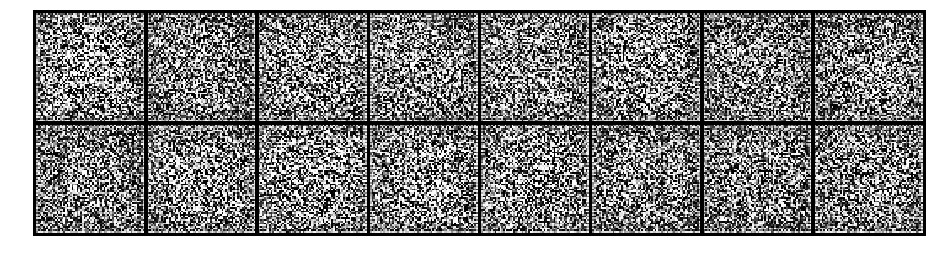

Epoch: [0/200], Batch Num: [0/469]
Discriminator Loss: 1.3934, Generator Loss: 1.6825
D(x): 0.5184, D(G(z)): 0.5101


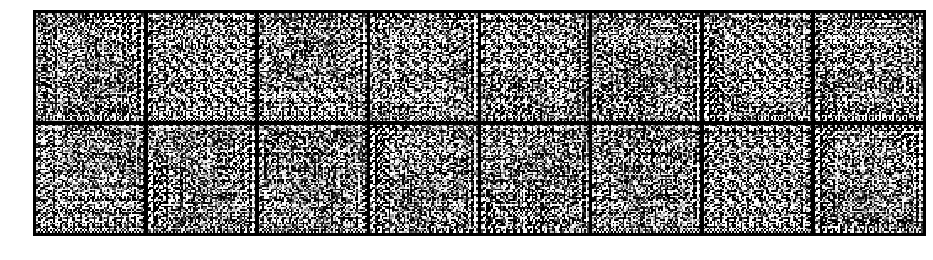

Epoch: [0/200], Batch Num: [100/469]
Discriminator Loss: 0.4081, Generator Loss: 3.4244
D(x): 0.9535, D(G(z)): 0.0855


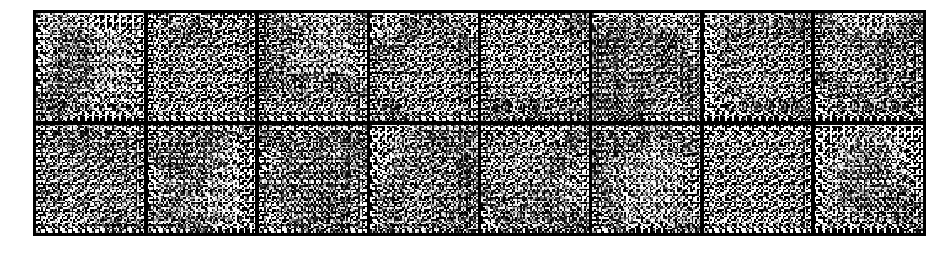

Epoch: [0/200], Batch Num: [200/469]
Discriminator Loss: 0.4000, Generator Loss: 2.8220
D(x): 0.9624, D(G(z)): 0.0600


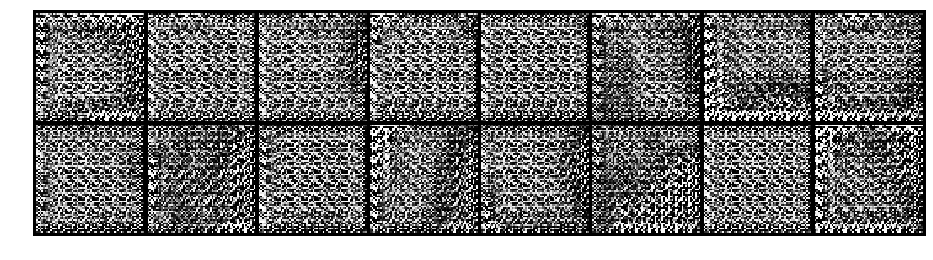

Epoch: [0/200], Batch Num: [300/469]
Discriminator Loss: 0.4033, Generator Loss: 3.6034
D(x): 0.9580, D(G(z)): 0.0820


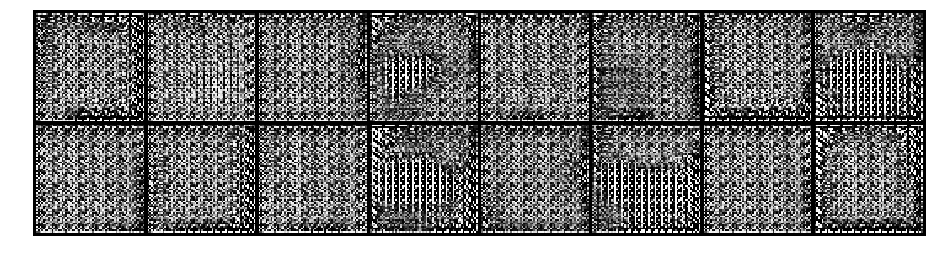

Epoch: [0/200], Batch Num: [400/469]
Discriminator Loss: 0.4600, Generator Loss: 4.4599
D(x): 0.9238, D(G(z)): 0.0109


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1, 1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


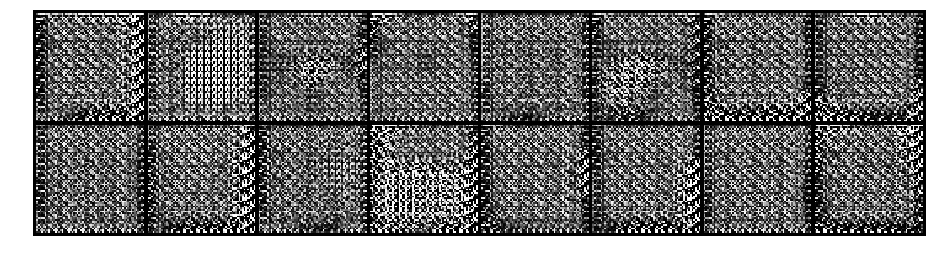

Epoch: [1/200], Batch Num: [0/469]
Discriminator Loss: 0.3991, Generator Loss: 2.8658
D(x): 0.9468, D(G(z)): 0.0530


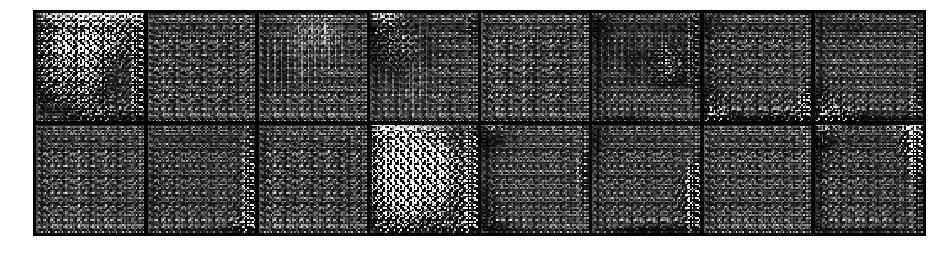

Epoch: [1/200], Batch Num: [100/469]
Discriminator Loss: 0.4550, Generator Loss: 2.8669
D(x): 0.9436, D(G(z)): 0.1495


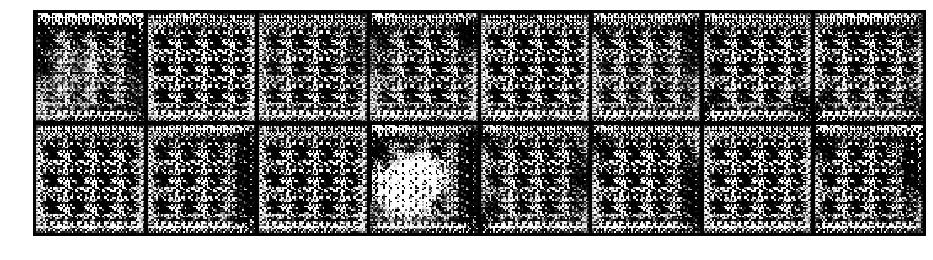

Epoch: [1/200], Batch Num: [200/469]
Discriminator Loss: 0.4022, Generator Loss: 2.5669
D(x): 0.9496, D(G(z)): 0.0465


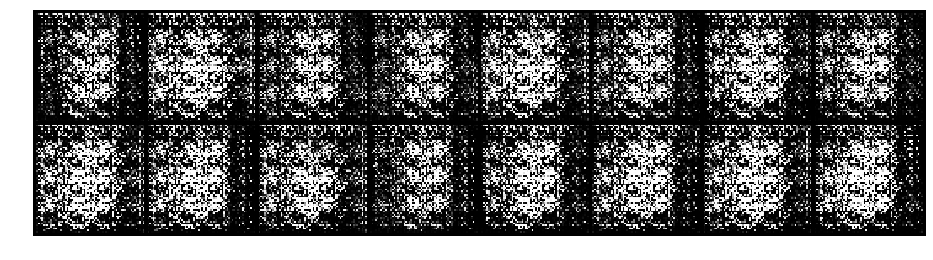

Epoch: [1/200], Batch Num: [300/469]
Discriminator Loss: 0.4582, Generator Loss: 2.8006
D(x): 0.9812, D(G(z)): 0.0996


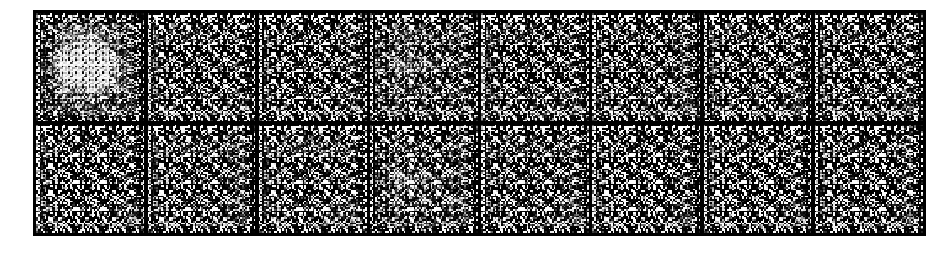

Epoch: [1/200], Batch Num: [400/469]
Discriminator Loss: 0.4004, Generator Loss: 3.6238
D(x): 0.9490, D(G(z)): 0.0697


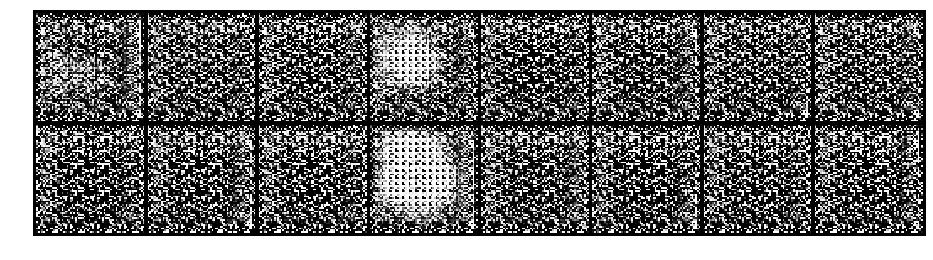

Epoch: [2/200], Batch Num: [0/469]
Discriminator Loss: 0.3991, Generator Loss: 2.7547
D(x): 0.9569, D(G(z)): 0.0651


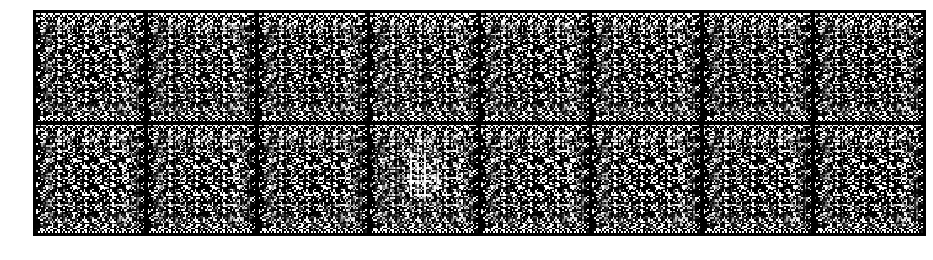

Epoch: [2/200], Batch Num: [100/469]
Discriminator Loss: 0.3973, Generator Loss: 2.8686
D(x): 0.9582, D(G(z)): 0.0642


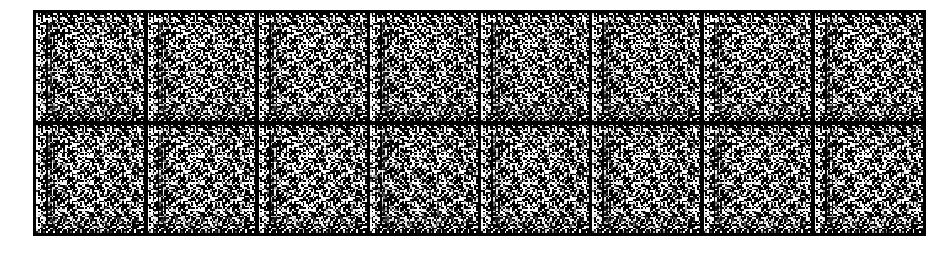

Epoch: [2/200], Batch Num: [200/469]
Discriminator Loss: 0.4167, Generator Loss: 3.6557
D(x): 0.9429, D(G(z)): 0.0225


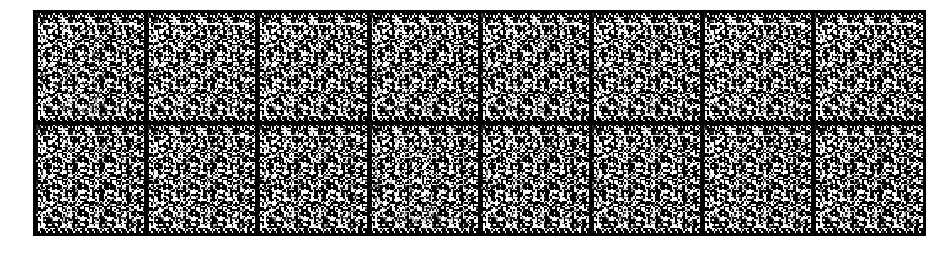

Epoch: [2/200], Batch Num: [300/469]
Discriminator Loss: 0.3979, Generator Loss: 2.6178
D(x): 0.9540, D(G(z)): 0.0451


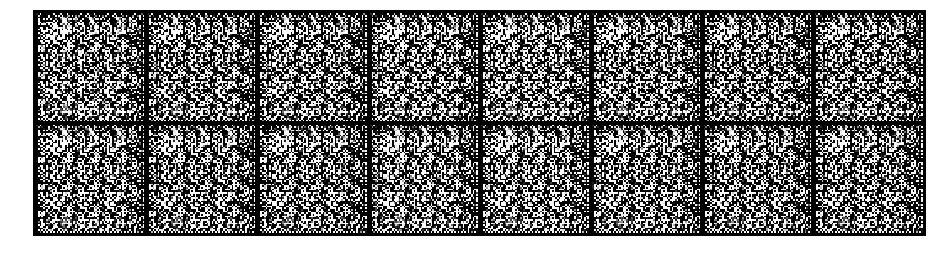

Epoch: [2/200], Batch Num: [400/469]
Discriminator Loss: 0.3967, Generator Loss: 2.9479
D(x): 0.9549, D(G(z)): 0.0576


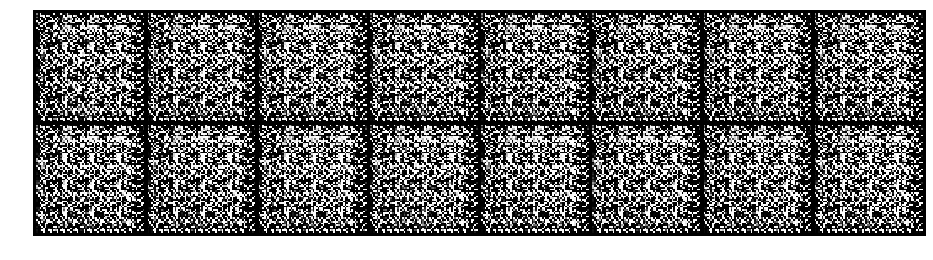

Epoch: [3/200], Batch Num: [0/469]
Discriminator Loss: 0.4001, Generator Loss: 3.0158
D(x): 0.9478, D(G(z)): 0.0415


KeyboardInterrupt: ignored

In [66]:
logger = Logger(model_name = 'DCGAN' , data_name = 'MNIST')
num_epoch = 200

for epoch in range(num_epoch):
  for n_batch, (real_batch,_) in enumerate(data_loader):
    N = real_batch.size(0)
    
    #train discriminator
    real_data = Variable(real_batch.cuda())
    fake_data = generator(noise(N).view(-1,100,1,1)).detach()
    
    d_err,d_r_pred,d_f_pred = train_discriminator(d_optimiser,real_data,fake_data)
    
    #train generator
    
    fake_data = generator(noise(N).view(-1,100,1,1)) #G(z)
    g_err = train_generator(g_optimiser,fake_data)
    
    # Log batch error
    logger.log(d_err, g_err, epoch, n_batch, num_batches)
    # Display Progress every few batches
    if (n_batch) % 100 == 0: 
        test_images = generator(test_noise.view(-1,100,1,1))
        test_images = test_images.data
        logger.log_images(
            test_images.cpu(), num_test_samples, 
            epoch, n_batch, num_batches
        );
        # Display status Logs
        logger.display_status(
            epoch, num_epoch, n_batch, num_batches,
            d_err, g_err, d_r_pred, d_f_pred
        )
    
